In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris["data"]
Y = iris["target"]
feature_names = iris["feature_names"]

In [3]:
print "The shape of X is : ", X.shape
print "The shape of Y is : ", Y.shape
print "The features are: "
for feature in feature_names:
    print " "*4, feature

The shape of X is :  (150, 4)
The shape of Y is :  (150,)
The features are: 
     sepal length (cm)
     sepal width (cm)
     petal length (cm)
     petal width (cm)


In [4]:
 for x, y in zip(X, Y):
     print("x", x, "y", y)

('x', array([ 5.1,  3.5,  1.4,  0.2]), 'y', 0)
('x', array([ 4.9,  3. ,  1.4,  0.2]), 'y', 0)
('x', array([ 4.7,  3.2,  1.3,  0.2]), 'y', 0)
('x', array([ 4.6,  3.1,  1.5,  0.2]), 'y', 0)
('x', array([ 5. ,  3.6,  1.4,  0.2]), 'y', 0)
('x', array([ 5.4,  3.9,  1.7,  0.4]), 'y', 0)
('x', array([ 4.6,  3.4,  1.4,  0.3]), 'y', 0)
('x', array([ 5. ,  3.4,  1.5,  0.2]), 'y', 0)
('x', array([ 4.4,  2.9,  1.4,  0.2]), 'y', 0)
('x', array([ 4.9,  3.1,  1.5,  0.1]), 'y', 0)
('x', array([ 5.4,  3.7,  1.5,  0.2]), 'y', 0)
('x', array([ 4.8,  3.4,  1.6,  0.2]), 'y', 0)
('x', array([ 4.8,  3. ,  1.4,  0.1]), 'y', 0)
('x', array([ 4.3,  3. ,  1.1,  0.1]), 'y', 0)
('x', array([ 5.8,  4. ,  1.2,  0.2]), 'y', 0)
('x', array([ 5.7,  4.4,  1.5,  0.4]), 'y', 0)
('x', array([ 5.4,  3.9,  1.3,  0.4]), 'y', 0)
('x', array([ 5.1,  3.5,  1.4,  0.3]), 'y', 0)
('x', array([ 5.7,  3.8,  1.7,  0.3]), 'y', 0)
('x', array([ 5.1,  3.8,  1.5,  0.3]), 'y', 0)
('x', array([ 5.4,  3.4,  1.7,  0.2]), 'y', 0)
('x', array([

In [5]:
df = pd.DataFrame(X)
df.head(150)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
df.columns = feature_names
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [7]:
df["iris_type"] =Y
df.head(50)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


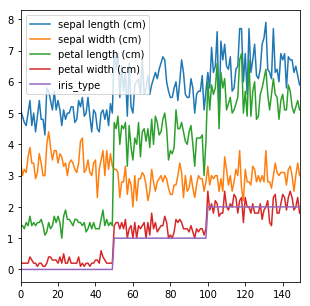

In [8]:
df.plot(figsize=(5, 5))


Text(0.5,1,u'iris data 2d')

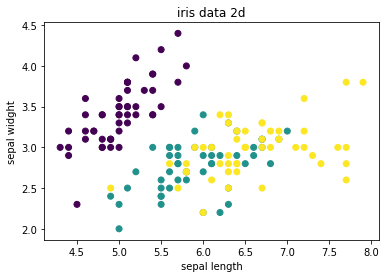

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel('sepal length')
plt.ylabel('sepal widght')
plt.title('iris data 2d')

# 3d visualization

Text(0.5,0,u'petal length (cm)')

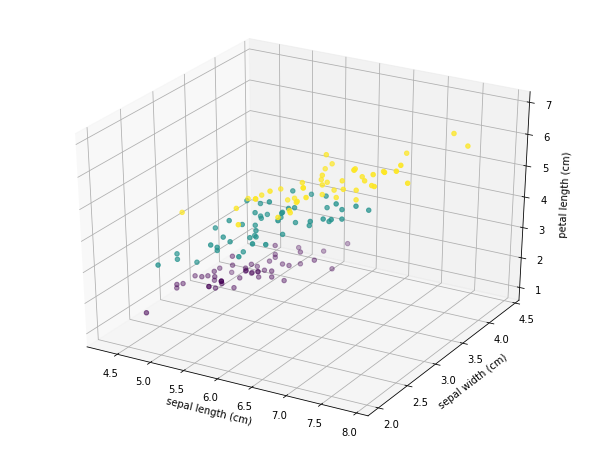

In [10]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=Y)
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])

# Modeling

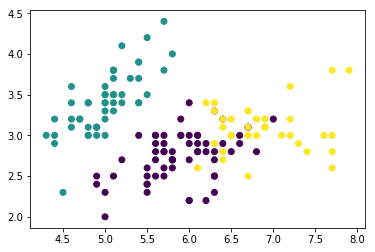

In [11]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)
Y_pred = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=Y_pred)

In [14]:
kmeans.score(X,Y_pred)

-78.940841426145937

In [18]:
np.sort(Y_pred)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)